In [1]:
!date
!which python
!python --version

Sat Sep 28 14:33:25 CST 2024
/public/workspace/ryrl/venvs/versions/3.12.4/torch/bin/python
Python 3.12.4


In [6]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import dask.dataframe as dd

sns.set_theme(style='white')
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.42 ms (started: 2024-09-28 18:40:18 +08:00)


In [2]:
adata = sc.read_h5ad('/public/workspace/ryrl/data/GTEx/GTEx_8_tissues_snRNAseq_immune_atlas_071421.public_obs.h5ad')
adata

AnnData object with n_obs × n_vars = 14156 × 16150
    obs: 'n_genes', 'tissue', 'prep', 'individual', 'nGenes', 'nUMIs', 'PercentMito', 'PercentRibo', 'Age_bin', 'Sex', 'Sample ID', 'participant_id', 'Sample ID short', 'Sample Ischemic Time (mins)', 'Tissue Site Detail', 'scrublet', 'scrublet_score', 'barcode', 'batch', 'annotation', 'broad', 'granular', 'leiden', 'Tissue', 'LAM_prediction'
    var: 'gene_ids', 'Chromosome', 'gene_name', 'gene_biotype', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sex_colors', 'Tissue_colors', 'annotation_colors', 'annotation_sizes', 'broad_colors', 'dendrogram_annotation', 'dendrogram_leiden', 'granular_colors', 'hvg', 'lam_02_colors', 'leiden', 'leiden_DE', 'neighbors', 'paga', 'participant_id_colors', 'pca', 'prediction_colors', 'prep_colors', 'rank_genes_groups', 'tissue_colors', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'dis

time: 2.16 s (started: 2024-09-28 18:39:30 +08:00)


In [3]:
adata.obs['tissue'].unique()

['breast', 'esophagusmucosa', 'esophagusmuscularis', 'heart', 'lung', 'prostate', 'skeletalmuscle', 'skin']
Categories (8, object): ['breast', 'esophagusmucosa', 'esophagusmuscularis', 'heart', 'lung', 'prostate', 'skeletalmuscle', 'skin']

time: 4.36 ms (started: 2024-09-28 18:39:33 +08:00)


In [4]:
adata.obs['prep'].unique()

['CST', 'EZ', 'NST', 'TST']
Categories (4, object): ['CST', 'EZ', 'NST', 'TST']

time: 3.93 ms (started: 2024-09-28 18:39:35 +08:00)


In [5]:
df = adata.to_df()
df.shape

(14156, 16150)

time: 567 ms (started: 2024-09-28 18:39:49 +08:00)


In [21]:
coef = np.corrcoef(df.values, rowvar=True)
# pd.DataFrame(coef, index=df.columns, columns=df.columns).to_parquet('/public/workspace/ryrl/projects/classmates/ryrl/GraphCausal/GTEx/similarity.matrix.parquet')
# coef = pd.DataFrame(coef, index=df.columns, columns=df.columns)
coef.shape

(14156, 14156)

time: 9.4 s (started: 2024-09-28 19:17:08 +08:00)


In [22]:
df_ = pd.DataFrame(np.where(np.abs(coef) < .3, 0, coef), index=df.index, columns=df.index)
df_.head()

,CST01_CCTCTGAGTCACCTAA-breast,CST01_GGTGCGTCATGCATGT-breast,CST01_CCAATCCAGGGCTCTC-breast,CST01_GATCAGTCAGTCACTA-breast,CST01_CGTTGGGGTGCTAGCC-breast,CST01_CACCAGGTCGCGGATC-breast,CST01_TCATTTGCACAGACTT-breast,CST01_CGTTAGATCCTCATTA-breast,CST01_TGCTGCTCAATGGTCT-breast,CST01_GTGAAGGGTACAGACG-breast,...,TST01_TCTGGAACATCGATGT-skin,TST01_TTCTCCTAGAGTACCG-skin,TST01_GTCACAACACAACGCC-skin,TST01_TAGGCATTCAGTGCAT-skin,TST01_TGTGGTAAGTGTCTCA-skin,CST03_ACTTACTCATCGATGT-skin,CST03_CAGCTGGTCAAACAAG-skin,EZ03_GACCTGGAGGTGACCA-skin,EZ03_TCTTTCCGTTCACGGC-skin,EZ03_ATGAGGGAGCAACGGT-skin
CST01_CCTCTGAGTCACCTAA-breast,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CST01_GGTGCGTCATGCATGT-breast,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CST01_CCAATCCAGGGCTCTC-breast,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CST01_GATCAGTCAGTCACTA-breast,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CST01_CGTTGGGGTGCTAGCC-breast,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


time: 2.72 s (started: 2024-09-28 19:17:21 +08:00)


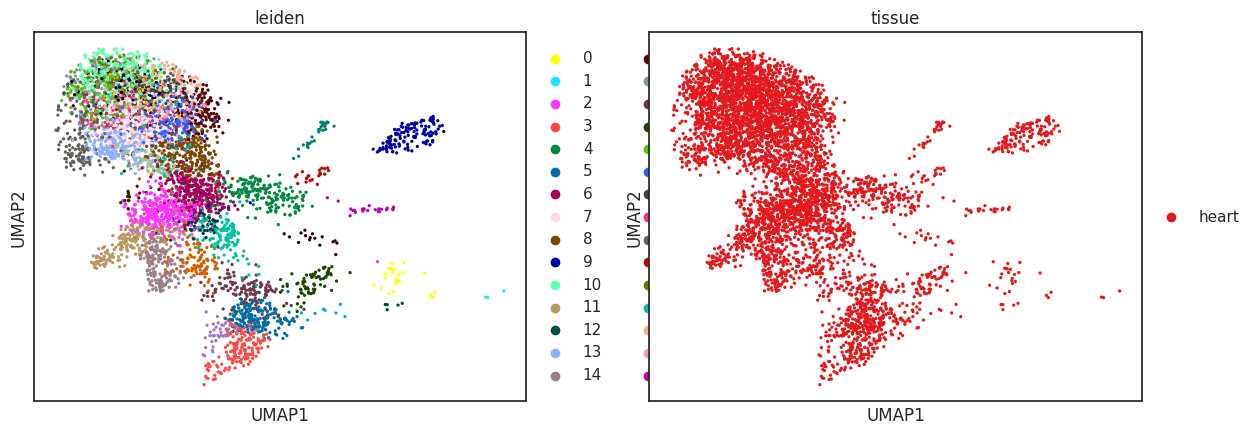

time: 1.18 s (started: 2024-09-28 19:30:04 +08:00)


In [25]:
sc.pl.umap(adata[adata.obs['tissue'] == 'heart'], color=['leiden', 'tissue'])